<a href="https://colab.research.google.com/github/jboyd170/face-recognition/blob/main/Face_Recognition_using_face_recognition_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Face Recognition

adapted from video by: https://github.com/adarsh1021



In [1]:
!pip install face_recognition

In [2]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow
import numpy as np
from datetime import datetime

## Clone Directories and set directory


In [3]:
!git clone https://github.com/jboyd170/face-recognition.git
!mkdir face_recognition

/content/face_recognition


In [4]:
%cd face_recognition/

/content/face_recognition


In [ ]:
#!mkdir known
#!wget https://www.biography.com/.image/t_share/MTY2MzU3Nzk2OTM2MjMwNTkx/elon_musk_royal_society.jpg -O known/elon.jpg
#!wget https://pbs.twimg.com/profile_images/988775660163252226/XpgonN0X_400x400.jpg -O known/bill.jpg
#!wget https://www.biography.com/.image/t_share/MTE4MDAzNDEwNzg5ODI4MTEw/barack-obama-12782369-1-402.jpg -O known/obama.jpg

In [ ]:
#!mkdir unknown
#!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg
#!wget https://cdn-images-1.medium.com/max/1200/1*aEoYLgy4z1lT1kW7dqWzBg.jpeg -O unknown/2.jpg
#!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg
#!wget https://specials-images.forbesimg.com/imageserve/1184274010/960x0.jpg -O unknown/4.jpg

## Function to read image from file and return sized image

In [5]:
%pwd

'/content/face_recognition'

In [6]:
def read_img(path):
    img = cv2.imread(path)
    #print("Path: ",path)
    (h, w) = img.shape[:2]
    #print("h and w: ", h, w)
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    print("width and height: ", width, height)
    return cv2.resize(img, (width, height))

## Read images from 'known' images directory and create face encoding

width and height:  500 502
kobe.jpg


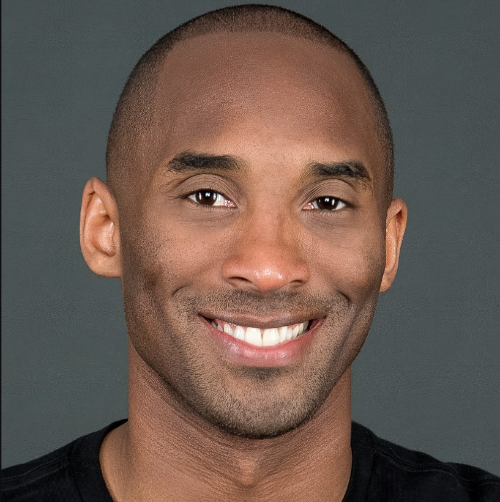

width and height:  500 500
obama.jpg


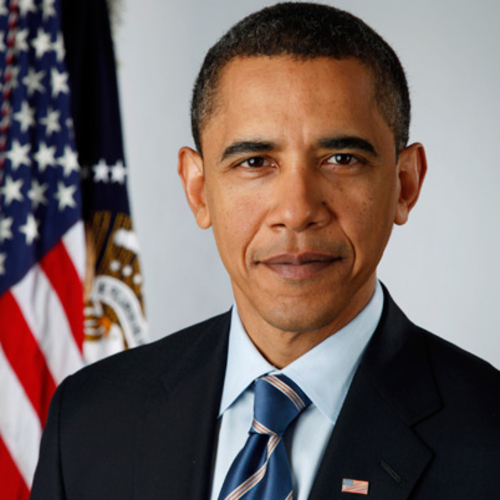

AttributeError: ignored

In [7]:
known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]  # create encoding of 'known' images
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])
    print(file)
    cv2_imshow(img)
print(known_names, known_encodings)

## Run it all together 

Encode known images, compare to unknown images and print out images with identification

Path:  known/kobe.jpg
h and w:  821 817
width and height:  500 502
Path:  known/obama.jpg
h and w:  1200 1200
width and height:  500 500
Path:  known/bill.jpg
h and w:  399 399
width and height:  500 500
Path:  known/elon.jpg
h and w:  1200 1200
width and height:  500 500
Processing 4.jpg
Path:  unknown/4.jpg
h and w:  640 960
width and height:  500 333
Results:  [0.73708679 0.36119874 0.81558537 0.84514971]


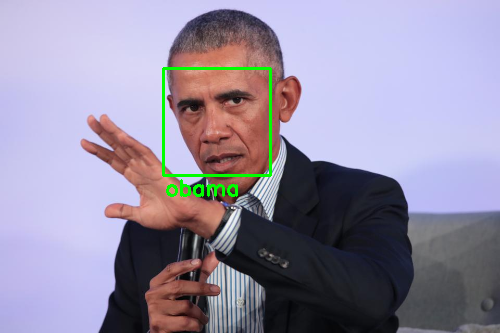

Processing 2.jpg
Path:  unknown/2.jpg
h and w:  876 938
width and height:  500 466
Results:  [0.84463321 0.70370519 0.90933964 0.86077054]
File: 2.jpg is unknown


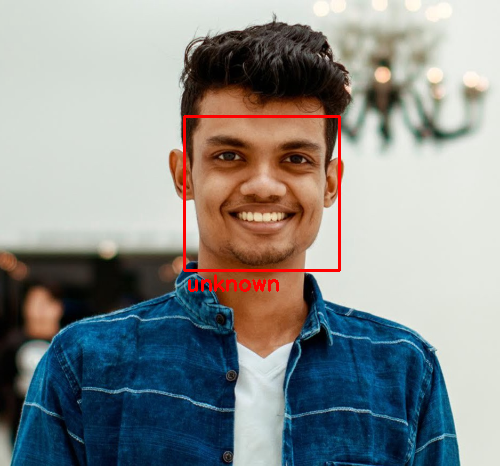

Processing 8.jpg
Path:  unknown/8.jpg
h and w:  897 962
width and height:  500 466
Results:  [0.41036492 0.74189294 0.87236682 0.85397204]


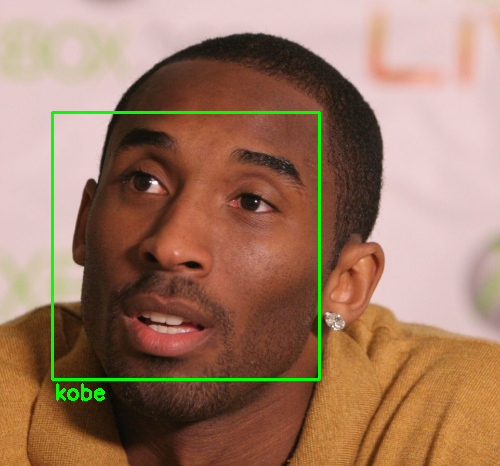

Processing 3.jpg
Path:  unknown/3.jpg
h and w:  462 760
width and height:  500 303
Results:  [0.88984244 0.8689792  0.49118813 0.82515053]


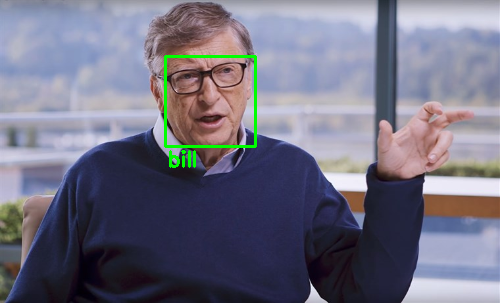

Processing 1.jpg
Path:  unknown/1.jpg
h and w:  1380 1840
width and height:  500 375
Results:  [0.84362358 0.83622447 0.6920464  0.49094296]


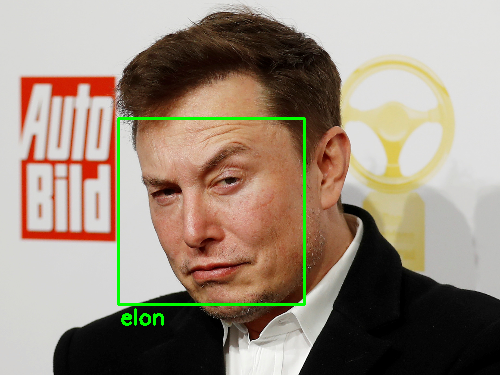

In [11]:
known_encodings = []
known_names = []

for file in os.listdir(known_dir):
    img = read_img(known_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    print("Results: ", face_recognition.face_distance(known_encodings, img_enc))
    name = "unknown"
    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 255, 0), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
            cv2_imshow(img)
    if name == "unknown":
        print("File: " + file + " is unknown")
        (top, right, bottom, left) = face_recognition.face_locations(img)[0]
        cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(img, "unknown", (left+2, bottom+20), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
        cv2_imshow(img)
            




## Add own images